# bài 1:

Cho phương trình f(x)= x^2, hãy sử dụng thuật toán gradient descent để tối ưu. Sau đó vẽ đồ thị hàm f(x) sau 10 lần cập nhật bước 2 với:
- Lr = 0.2
- Lr = 2

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import math

We have function: f(x) = x^2 => f'(x) = 2x
Giả sử bắt đầu từ một điểm x_o nào đó, tại vòng lặp thứ t, Update:
X_(t+1) = X_t - lr*f'(x)

Tiếp theo, viết các hàm số :
- grad để tính đạo hàm
- cost để tính giá trị của hàm số. Hàm này không sử dụng trong thuật toán nhưng thường được dùng để kiểm tra việc tính đạo hàm của đúng không hoặc để xem giá trị của hàm số có giảm theo mỗi vòng lặp hay không.
- myGD1 là phần chính thực hiện thuật toán Gradient Desent nêu phía trên. Đầu vào của hàm số này là learning rate và điểm bắt đầu. Thuật toán dừng lại khi đạo hàm có độ lớn đủ nhỏ.


In [10]:
from __future__ import division, print_function, unicode_literals
from matplotlib.animation import FuncAnimation

In [3]:
def grad(x):
    return 2*x
def cost(x):
    return x**2
def myGD1(lr, x0):
    x = [x0]
    for it in range(100):
        x_new = x[-1] - lr*grad(x[-1])
        if abs(grad(x_new)) < 1e-3:
            break
        x.append(x_new)
    return (x, it)

Sau khi có các hàm cần thiết, thử tìm nghiệm với các điểm khởi tạo khác nhau là x_o = 5; x_o = -5

In [4]:
(x1, it1) = myGD1(.1, -5)
(x2, it2) = myGD1(.1, 5)
print('Solution x1 = %f, cost = %f, obtained after %d iterations'%(x1[-1], cost(x1[-1]), it1))
print('Solution x2 = %f, cost = %f, obtained after %d iterations'%(x2[-1], cost(x2[-1]), it2))

Solution x1 = -0.000532, cost = 0.000000, obtained after 41 iterations
Solution x2 = 0.000532, cost = 0.000000, obtained after 41 iterations


Vậy là với các điểm ban đầu khác nhau, thuật toán của chúng ta tìm được nghiệm gần giống nhau, mặc dù với tốc độ hội tụ khác nhau

Tốc độ hội tụ của GD không những phụ thuộc vào điểm khởi tạo ban đầu mà còn phụ thuộc vào learning rate. Dưới đây là một ví dụ với cùng điểm khởi tạo x_o = -5 nhưng learning rate khác nhau:

In [32]:
(x3, it3) = myGD1(.2, -5)
(x4, it4) = myGD1(2, -5)
print('Solution x3 = %f, cost = %f, obtained after %d iterations'%(x3[-1], cost(x3[-1]), it3))
print('Solution x4 = %f, cost = %f, obtained after %d iterations'%(x4[-1], cost(x4[-1]), it4))

Solution x3 = -0.000508, cost = 0.000000, obtained after 18 iterations
Solution x4 = -2576887603660056783232258173556455595840307724288.000000, cost = 6640349721896869070323637798345196238790085728800045141398932368292448576929195459708050798018560.000000, obtained after 99 iterations


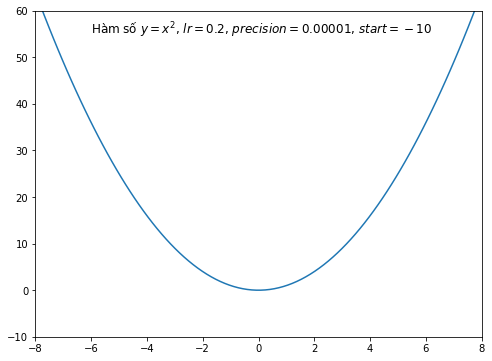

In [33]:
fig = plt.figure(figsize=[8, 6])
ax = plt.axes(xlim=(-8, 8), ylim=(-10, 60))
ax.text(-6, 55, 'Hàm số $y=x^2$, $lr=0.2$, $precision=0.00001$, $start=-10$', fontsize=12)
label_1 = ax.text(-6, 50, '', fontsize=12)
label_2 = ax.text(0, 30, '', fontsize=20)

line, = ax.plot([], [], 'ro-', lw=5)
x = np.linspace(start=-8, stop=8, num=100)
y = cost(x)
ax.plot(x,y)

In [14]:
x_1 = 10
x_0 = 0
lr = 0.2
precision = 0.00001

- x_0 chứa giá trị trước đó
- x_1 là giá trị trong bước tiếp theo
- step_multiplier là hệ số kết hợp với độ dốc(learning rate). 

Biến precision quyết định khi nào dừng thuật toán, nó là độ chính xác trong phép tính xấp xỉ mà chúng ta mong muốn, ở đây độ chính xác đến 1/100k.
Tiếp theo, chúng ta sẽ cài đặt thuật toán Gradient Descent kết hợp với định nghĩa các phần vẽ hoạt họa:

In [17]:

import networkx as nx
from matplotlib.animation import FuncAnimation, PillowWriter 

In [18]:
def animate(i):
    global x_0, x_1
    step_size = abs(x_1 - x_0)

    if step_size > precision:
        x_0 = x_1
        gradient = grad(x_0)
        x_1 = x_0 - lr * gradient
        x = [x_0, x_1]
        y = [cost(x_0), cost(x_1)]
        line.set_data(x, y)
        label_2.set_text(str(i))
    label_1.set_text('Lần: ' + str(i) + '/50, cost:' + str(cost(x_1)) + ', slope:' + str(grad(x_1)))
    return line, 

In [26]:
!pip install animation

  Created wheel for pychalk: filename=pychalk-2.0.1-py3-none-any.whl size=7667 sha256=859d063a655c70349dcb95970e5209bce7f2beb16f1f401c4726692d48b59024
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\d7\19\42\91e862a7e0b8f8637c7b11bae6ed7c63db5e46103ed42bb633
Successfully built pychalk


In [29]:
from matplotlib.animation import FuncAnimation
#animation.convert_path:  magick
anim = FuncAnimation(fig, animate, frames=50, interval=400, blit=True)
anim.save('gradient_descent.gif', writer='imagemagick')

MovieWriter imagemagick unavailable; using Pillow instead.


# Bài 2: 
Cho dataset dự đoán giá nhà dựa vào diện tích 
- Implement thuật toán linear regression với dữ liệu trên
- Chỉnh learning rate cho dữ liệu trên, chọn 1 learning rate lớn bị overshoot, 1 learning vừa, và 1 learning rate nhỏ. Với mỗi learning rate, vẽ đồ thị loss tương ứng
- Chia tập train/test tỉ lệ 80/20, tính các chỉ số MSE, RSME, MAE, MAPE trên tập test


In [29]:
df = pd.read_csv('data_linear.csv')
df[df['Diện tích'] >= 48].head()

,Diện tích,Giá
8,49.3103,748.918
9,51.7241,757.881
10,54.1379,831.004
11,56.5517,855.409
12,58.9655,866.707


### Test1: Learning rate vừa

[13929872.64455245]
[10306582.37422079]
[7625999.18237673]
[5642849.69326854]
[4175675.71851866]
[3090230.83195734]
[2287196.82094014]
[1693096.06938209]
[1253568.35550934]
[928396.89128833]
[687828.48611463]
[509851.12972016]
[378179.89312088]
[280766.8575313]
[208698.72973386]
[155381.27570385]
[115935.94816237]
[86753.4994753]
[65163.7354763]
[49191.19268689]
[37374.38339803]
[28632.06953731]
[22164.32937972]
[17379.36470576]
[13839.35126131]
[11220.37783611]
[9282.80838638]
[7849.35533562]
[6788.85776037]
[6004.28016513]
[5423.83373397]
[4994.40765352]
[4676.70947326]
[4441.66984614]
[4267.78268312]
[4139.13734594]
[4043.96282366]
[3973.55068504]
[3921.4582571]
[3882.91912046]
[3854.40698198]
[3833.3130189]
[3817.70717153]
[3806.16154282]
[3797.61974572]
[3791.30024382]
[3786.62484071]
[3783.16577503]
[3780.60658031]
[3778.71312826]
[3777.31220606]
[3776.27566738]
[3775.50870698]
[3774.94118601]
[3774.52121437]
[3774.21040269]
[3773.98034975]
[3773.81004376]
[3773.68393976]
[3773.5

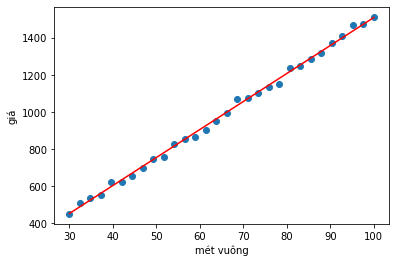

Giá nhà cho 50m^2 là :  [755.68795083]


In [23]:
data = pd.read_csv('data_linear.csv').values

N = data.shape[0]
x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)
plt.scatter(x, y)
plt.xlabel('mét vuông')
plt.ylabel('giá')

x = np.hstack((np.ones((N, 1)), x))

w = np.array([0.,1.]).reshape(-1,1)

numOfIteration = 100
cost = np.zeros((numOfIteration,1))
learning_rate = 0.000001
for i in range(1, numOfIteration):
    r = np.dot(x, w) - y
    cost[i] = 0.5*np.sum(r*r)
    w[0] -= learning_rate*np.sum(r)
    # correct the shape dimension
    w[1] -= learning_rate*np.sum(np.multiply(r, x[:,1].reshape(-1,1)))
    print(cost[i])
predict = np.dot(x, w)
plt.plot((x[0][1], x[N-1][1]),(predict[0], predict[N-1]), 'r')
plt.show()

x1 = 50
y1 = w[0] + w[1] * 50
print('Giá nhà cho 50m^2 là : ', y1)

#### Predict price for the house that have 50m^2 is 755.688 close to actual value (748.918, 757.881)

### Test2: Learning rate lớn  => overshoot

C:\Users\Admin\AppData\Local\Temp\ipykernel_30996\46953607.py:16: RuntimeWarning: overflow encountered in multiply
  cost[i] = 0.5*np.sum(r*r)


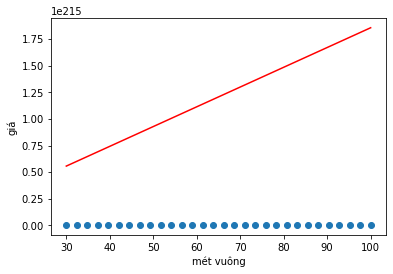

Giá nhà cho 50m^2 là :  [9.27834008e+214]


In [18]:
x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)
plt.scatter(x, y)
plt.xlabel('mét vuông')
plt.ylabel('giá')

x = np.hstack((np.ones((N, 1)), x))

w = np.array([0.,1.]).reshape(-1,1)

numOfIteration = 100
cost = np.zeros((numOfIteration,1))
learning_rate = 0.001
for i in range(1, numOfIteration):
    r = np.dot(x, w) - y
    cost[i] = 0.5*np.sum(r*r)
    w[0] -= learning_rate*np.sum(r)
    # correct the shape dimension
    w[1] -= learning_rate*np.sum(np.multiply(r, x[:,1].reshape(-1,1)))
    #print(cost[i])
predict = np.dot(x, w)
plt.plot((x[0][1], x[N-1][1]),(predict[0], predict[N-1]), 'r')
plt.show()

x1 = 50
y1 = w[0] + w[1] * 50
print('Giá nhà cho 50m^2 là : ', y1)

#### Predict price for the house that have 50m^2 is 9.278 extremely small compare to actual value (748.918, 757.881)

### Learning rate nhỏ

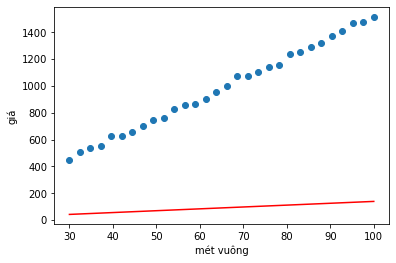

Giá nhà cho 50m^2 là :  [69.2783195]


In [17]:
x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)
plt.scatter(x, y)
plt.xlabel('mét vuông')
plt.ylabel('giá')

x = np.hstack((np.ones((N, 1)), x))

w = np.array([0.,1.]).reshape(-1,1)

numOfIteration = 100
cost = np.zeros((numOfIteration,1))
learning_rate = 0.000000002
for i in range(1, numOfIteration):
    r = np.dot(x, w) - y
    cost[i] = 0.5*np.sum(r*r)
    w[0] -= learning_rate*np.sum(r)
    # correct the shape dimension
    w[1] -= learning_rate*np.sum(np.multiply(r, x[:,1].reshape(-1,1)))
    #print(cost[i])
predict = np.dot(x, w)
plt.plot((x[0][1], x[N-1][1]),(predict[0], predict[N-1]), 'r')
plt.show()

x1 = 50
y1 = w[0] + w[1] * 50
print('Giá nhà cho 50m^2 là : ', y1)

In [31]:
#### Predict price for the house that have 50m^2 is 69.278 much small compare to actual value (748.918, 757.881)

In [34]:
y_train.head()
#

,Diện tích,Giá
19,75.8621,1138.690
2,34.8276,535.104
8,49.3103,748.918
18,73.4483,1103.880
15,66.2069,995.531


In [35]:
X, y = X_train, y_train

In [46]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [60]:
import torch
print(torch.__version__)

2.0.1+cpu


In [46]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2)
X_train = df_train.copy()
y_train = X_train['Giá']

X_test = df_test.copy()
y_test = X_test['Giá']
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(24, 2) (24,)
(6, 2) (6,)


###### 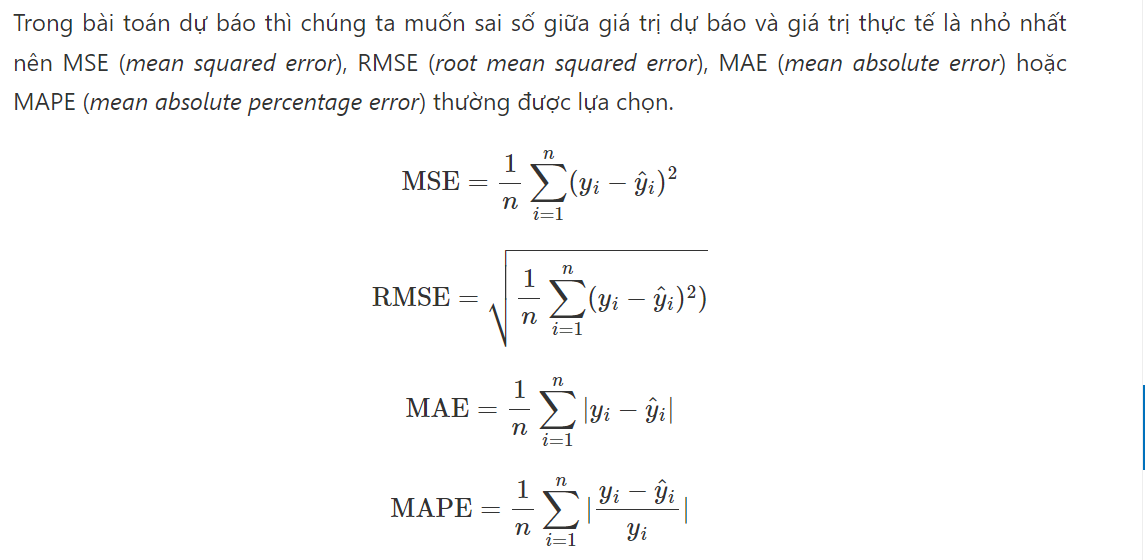

In [52]:
X = X_test['Diện tích']
y_pred = []
for x_i in X:
    y_i = w[0] + w[1] * x_i
    y_pred.append(y_i)

print(list(y_pred))

[array([891.15543968]), array([854.68324911]), array([1182.93296426]), array([599.37942609]), array([526.43504494]), array([745.26667739])]


In [53]:
#y_test = X_test['Giá']
y_true = y_test
print(y_true)

12     866.707
11     855.409
20    1153.130
4      623.418
2      535.104
8      748.918
Name: Giá, dtype: float64


### MSE

In [59]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_true, y_pred)
MSE

358.8009284097729

### RMSE

In [61]:
from math import sqrt
RMSE = sqrt(MSE)
RMSE

18.942041294690835

### MAE

In [60]:
from sklearn.metrics import mean_absolute_error #gọi thư viện để tính MAE

MAE = mean_absolute_error(y_true, y_pred)
MAE

15.222667736110907